In [120]:
from pylab import*
from matplotlib import*
from scipy import*
from scipy import interpolate
from scipy.misc import derivative

In [121]:
data = np.loadtxt('canicadata.txt.txt').T
xk=data[0]
fxk=data[1]
#dfxk=data[2]
rel=(xk,fxk,dfxk)

In [122]:
def interp(x,x_i,y_i):
    L = []
    a = []
    for k in range(len(x_i)):
        numer = np.ones(len(x))
        denom = np.ones(len(x))
        for i in range(len(x_i)):
            if i != k:
                a = x - x_i[i]
                numer = a*numer 
                b = x_i[k] - x_i[i]
                denom = b*denom   
        L.append(np.divide(numer,denom))
    ac = np.zeros(len(L[0]))
    for k in range(len(y_i)):
        ac = ac + L[k]*y_i[k]
    return ac

In [123]:
x = np.linspace(np.min(xk),np.max(xk),10000)
O = interp(x,xk,fxk)
#P = interpolate.lagrange(xk,dfxk)
#A = P(x)
S = interpolate.lagrange(xk, fxk)
D = S(x)
print (x)

[ 3.          3.00120012  3.00240024 ... 14.99759976 14.99879988
 15.        ]


In [124]:
#her = numpy.polynomial.hermite.hermfit(xk,fxk,3)
#print(her)
#hera = poly1d(her)
#print(hera)

In [125]:
her = interpolate.pchip_interpolate(xk, fxk, x)
#print(her)
hera = poly1d(her)
#print(hera)

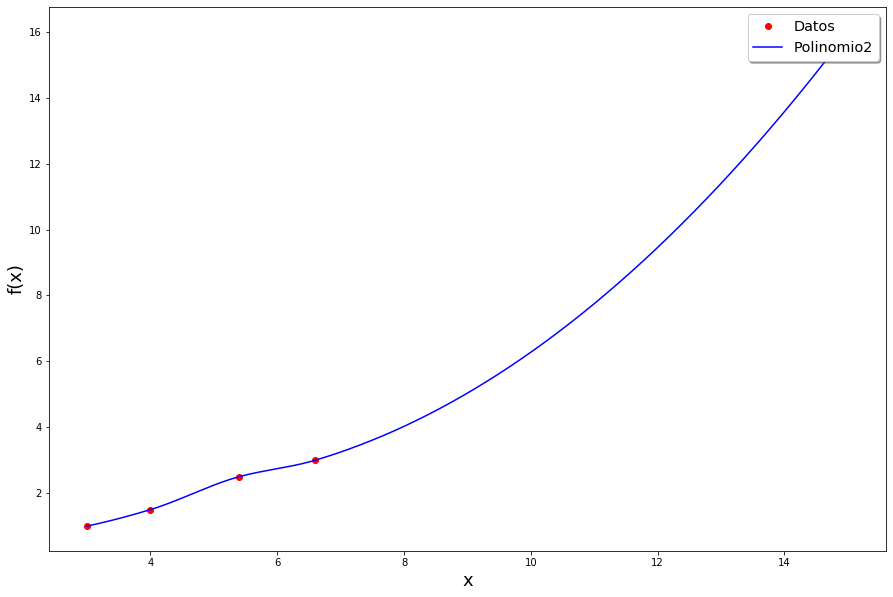

In [115]:
plt.figure(figsize=(15,10))
plt.plot(xk,fxk,'ro',label='Datos')
#plt.plot(xk,dfxk,'ko',label='Derivada')
#plt.plot(x,O,'k-' , label='Polinomio3')
plt.plot(x,hera,'b-' , label='Polinomio2')
#plt.plot(x,D,'g-' , label='Polinomio')


plt.xlabel("x",fontsize=18)
plt.ylabel("f(x)",fontsize=18)
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
#plt.ylim(1e-14,1e-12)

plt.show()

In [126]:
her = interpolate.pchip_interpolate(xk, fxk, x)
#print(her)
hera = poly1d(her)
#print(hera)

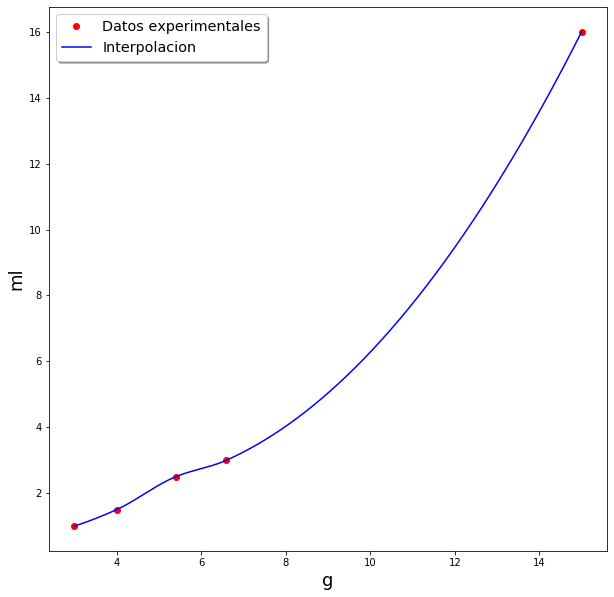

In [129]:
plt.figure(figsize=(10,10))
plt.plot(xk,fxk,'ro',label='Datos experimentales')
#plt.plot(xk,dfxk,'ko',label='Derivada')
#plt.plot(x,O,'k-' , label='Polinomio3')
plt.plot(x,hera,'b-' , label='Interpolacion')
#plt.plot(x,D,'g-' , label='Polinomio')


plt.xlabel("g",fontsize=18)
plt.ylabel("ml",fontsize=18)
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
#plt.ylim(1e-14,1e-12)

plt.savefig('canicas.png')